# Simple environment to test memory RL agents

### Setting up gym environment

In [0]:
import numpy as np
import gym
from gym import spaces
import matplotlib.pyplot as plt
import random
from PIL import Image, ImageDraw, ImageFont

In [0]:
class LineWorldMemory(gym.Env):
  def __init__(self, size=5, p=0, horizon=100):
    
    # Setting things up
    self.updates = 0
    self.size = size # size of the chain
    self.loc = (self.size - 1) // 2 # Start at the middle
    self.action_space = spaces.Discrete(4) # 0 - left, 1 - right, 2 - click blue, 3 - click green
    self.observation_space = spaces.Box(low=np.zeros(size+2), high=np.ones(size+2), dtype=np.uint8) # as the state space is one hot encoded
    self.p = p # stocasticity
    self.horizon = horizon

    # object choice
    self.color = random.choice(['blue', 'green'])
    self.color2val = {'blue':0, 'green':1}

    # Reward values
    self.step_reward = -1
    self.correct_reward = 10
    self.wrong_reward = -10

  def reset(self):
    self.updates = 0
    self.loc = (self.size - 1) // 2 # Start at the middle
    self.color = random.choice(['blue', 'green'])
    print(self.color)
    return self._loc2state(self.loc)

  def _loc2state(self, loc):
    temp = np.zeros(self.observation_space.shape[0])
    temp[loc] = 1
    if(self.loc == 0):
      temp[self.size + self.color2val[self.color]] = 1
    return temp

  def step(self, action):

    # Making sure valid action is chosen
    assert self.action_space.contains(action)

    self.updates += 1

    # If the environment is stocastic, you move equivalent to taking a random action
    if(np.random.rand() <= self.p):
      action = np.random.randint(low=0, high=4)

    done = False

    # Stepping along on the chain
    if(action == 0):
        self.loc = self.loc - 1
    elif(action == 1):
        self.loc = self.loc + 1

    # Compensating for walls
    if(self.loc < 0):
      self.loc = 0
    elif(self.loc >= self.size):
      self.loc = self.size - 1

    # Checking for termination
    R = self.step_reward
    if(self.updates >= self.horizon):
      done = True
    if((self.loc == self.size-1) and (action>=2)):
      done = True
      if(action-2 == self.color2val[self.color]):
        R = self.correct_reward
      else:
        R = self.wrong_reward

    return self._loc2state(self.loc), R, done, {}

  def render(self, mode='human', printR=False, cs=100):
    '''Rendering the state of environment
    
    passing for now, need to implement a nice visualization later.
    
    '''
    self.cs = cs
    h = self.size*cs
    w = cs
    img = Image.new('RGBA', (h, w), "white")
    draw = ImageDraw.Draw(img)

    for i in range(1, self.size):
    	draw.line([cs*i, 0, cs*i, h], fill="gray", width=10)
     
    for i in range(0, self.size):
      if(i == self.size-1):
        draw.ellipse([i*cs, 0, i*cs+cs, cs], fill="black")
      if(i == 0):
        draw.ellipse([0, 0, cs/2, cs/2], fill=self.color)
      if(i == self.loc):
        draw.ellipse([i*cs+cs/3, cs/3, i*cs+cs*2/3, 2*cs/3], fill="red")

    plt.title('red: agent | black: choose state')

    if(mode=="human"):
      plt.imshow(img)
      plt.show()

    elif(mode=="rgb_array"):
      return img
  


Setting up environment...
blue


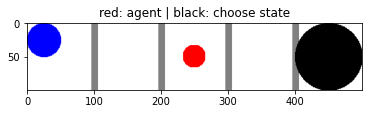

Choose your action: 0
(array([0., 1., 0., 0., 0., 0., 0.]), -1, False, {})


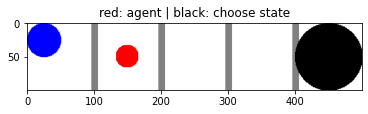

Choose your action: 0
(array([1., 0., 0., 0., 0., 1., 0.]), -1, False, {})


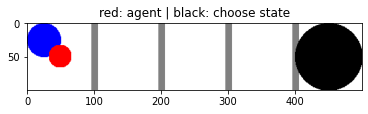

Choose your action: 1
(array([0., 1., 0., 0., 0., 0., 0.]), -1, False, {})


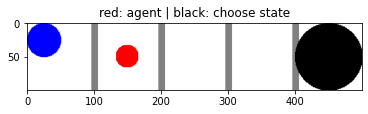

Choose your action: 1
(array([0., 0., 1., 0., 0., 0., 0.]), -1, False, {})


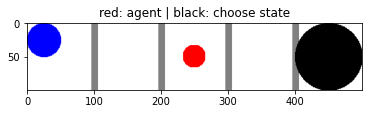

Choose your action: 1
(array([0., 0., 0., 1., 0., 0., 0.]), -1, False, {})


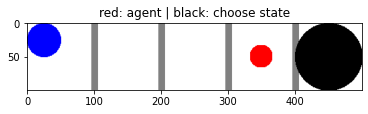

Choose your action: 1
(array([0., 0., 0., 0., 1., 0., 0.]), -1, False, {})


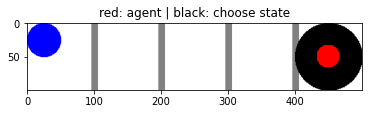

Choose your action: 2
(array([0., 0., 0., 0., 1., 0., 0.]), 10, True, {})


In [101]:
env = LineWorldMemory()
print('Setting up environment...')
env.reset()

for i in range(10):
  env.render()
  action = input('Choose your action: ')
  rets = env.step(int(action))
  print(rets)
  if(rets[2]):
    break

Choose your action: 1
1
